<div dir="rtl">

## ساختار برنامه نوشته شده 

برنامه زمانبند با زبان 
`Rust` 
نوشته شده است. محتوای کد در پوشه 
src/
قرار دارد. در این پوشه فایل‌های زیر قرار گرفته است:

1. **main.rs**:
فایل اصلی که اجرای برنامه را آغاز کرده و حاوی 
`Aurgument Parser`
می‌باشد که به کمک آن آرگون‌های ورودی را استخراج می‌کند. همچنین یک زمانبند از نوع
`Scheduler`
ساخته و با توجه به نوع آرگومان‌ها، 
`Dispatcher`
مناسب
(الویت محوری یا تصادفی)
را ساخته و به اندازه زمان ورودی داده شده، شبیه‌سازی را اجرا می‌کند. در نهایت‌ هم با استفاده از متد
export()
جدول شبیه‌سازی را به صورت یک فایل
csv
خروجی می‌دهد.

2. **lib.rs**:
در این فایل ساختار
`Scheduler`
تعریف شده است. اجرای آن با متد 
run()
صورت می‌گیرد. هر بار با صدا زدن این تابع، شبیه‌سازی یک واحد زمانی به جلو حرکت کرده و زمانبند در هر واحد زمانی به ترتیب کار‌های زیر را انجام می‌دهد:
   1. از بخش 
job_creator
تسک‌های جدید را در صورت وجود دریافت می‌کند.
   2. با استفاده از تابع
sync_jobs()
تسک‌ها را (با توجه به شرایط ذکر شده در سند پروژه) به ترتیب اولویت از صف اولویت لایه اول به لایه دوم منتقل می‌کند.
   3. اگر در حال تسکی برای اجرا نباشد، از سه صف موجود در لایه دوم بر اساس نوع
dispatcher
یک تسک را انتخاب کرده و آن را به اندازه یک واحد زمانی اجرا می‌کند.

همچنین برای ساخت زمانبند کافی است متد
new()
را صدا بزنیم. هنگام ساخت زمانبند، نوع
dispatcher
مشخص می‌شود.

3. **job_creator.rs**:
در این فایل، تسک‌ها با توزیع پواسون هنگام شبیه‌سازی ساخته می‌شوند. هنگام شبیه‌سازی شی
`Scheduler`
متد
poll()
از این شی را در هر لحظه صدا زده و 
job_creator
دارای متغیری به نام
next_dispatch
می‌باشد که از توزیع پواسون پیروی می‌کند و با هر بار صدا زدن تابع
poll()
یک واحد از آن کم می‌شود و اگر به صفر برسد،
job_creator
یک تسک را می‌سازد و به زمانبند تقدیم می‌کند.
(متغیر
next_dispatch
بعد از هر بار صفر شدن، باری دیگر طبق توزیع پاسون مقداری به خود می‌گیرد.)

4. **job_dsipatcher.rs**:
در این فایل دو ساختار
`JobDispathcer`
و
`WeightedDispatcher`
تعریف شده اند که در اولین ساختار تسک‌ها به ترتیب اولویت صف‌های لایه دوم اجرا می‌شوند و در در دومین مورد یک عدد تصادفی ساخته شده و تسک‌ها بنابر جدول احتمال موجود در سند پروژه اجرا می‌شوند.

5. **queue.rs**:
در این فایل صف‌های موجود در پروژه تعریف شده‌اند. دو نوع صف
`RRQueue`
و
`Fifo`
تعریف شده اند. این صف‌ها هر کدام حاوی توابع
push()
و
pop()
برای به‌روزرسانی خود می‌باشند.

6. **task.rs**:
در این فایل‌ شی تسک به وسیله ساختار‌های
`Task`،
`TaskDefinition`
توصیف شده است. هر شی
`TaskDefinition`
حاوی تعریف آن تسک شامل زمان اجرا، اولویت و 
timeout
آن می‌باشد. همچنین شی
`Task`
علاوه بر داشتن یک توصیف
`TaskDefinition`
حاوی مواردی مانند زمان ورود، زمان شروع اجرا، زمان پایان اجرا، درصد باقیمانده از اجرا و وضعیت اجرا دارد. هنگام شبیه‌سازی 
`Schedueler`
در هر واحد هنگامی که 
job_creator
یک 
TaskDefinition
جدید در اختیار زمانبند قرار می‌دهد، زمانبند با استفاده از متد
submit()
از روی تعریف یک شی
`Task`
را ساخته و بعد از مقداردهی فیلد‌های آن، در صف‌ اولویت لایه اول قرار می دهد.

7. **context.rs**:
در این فایل نحوه اجرای تسک‌ها توصیف شده است. دو ساختار
`DefaultContext`
و
`DeadlineContext`
تعریف شده اند که حاوی شی 
`Task`
و متدی به نام
exec()
می‌باشند. این تابع به صورت پیش‌فرض 
(`DefaultContext`)
متد
exec()
آن تسک را صدا زده و وضعیت آن را به‌روز‌رسانی می‌کند. همچنین در صورتی که 
context
یک تسک از نوع
`Deadline`
باشد، قبل از اجرای تسک، چک می‌کند که آیا اجرای آن تسک از ددلاین گذشته است یا نه.

8. **error.rs**:
در این فایل خطا‌ها و استثنا‌هایی که هنگام شبیه‌سازی به وجود می‌آید، تعریف شده است. به عنوان مثال اگر آرگومان‌های مربوط به پارامتر‌های
X
و
Y
در توزیع‌های پواسون و نمایی عددی منفی وارد شوند، برنامه به ترتیب استثنا‌های
`PoissonError`
و
`ExpError`
را باز می‌گرداند.
</div>

<div dir="rtl">

## نحوه ساخت و اجرای پروژه

برای ساخت پروژه ابتدا می‌بایست 
Rust
را نصب داشته باشید، برای نصب 
Rust
می‌توانید با این
[لینک](https://www.rust-lang.org/tools/install)
مراجعه کنید.
بعد از نصب
Rust
برای ساخت پروژه می‌توانید به مسیر پروژه مراجعه کرده و دستور زیر را اجرا کنید.
</div>

```rust
 cargo build --release
```

<div dir="rtl">
بعد از ساخت موفقیت آمیز پروژه، فایل اجرایی باینری 
simul
در مسیر
target/release/simul
قرار می گیرد.
برای مشاهده آرگومان‌ها کافی است با آرگومان
--help
یا
-h
برنامه را اجرا کنیم. آرگومان‌ها به شرح زیر می‌باشند:
</div>

1. **--sync_period** یا **-s**:
<div dir="rtl">
برابر با بازه زمانی انتقال تسک‌ها از لایه اول به لایه دوم می‌باشد.
</div>

2. **--job-threshold** یا **-j**:
<div dir="rtl">
برابر با مقدار ثابت
K
در سند پروژه بوده و معادل با حداکثر تعداد تسک‌هایی می‌باشد که از صف لایه اول به لایه دوم منتقل می‌شود.
</div>

3. **--arrival-rate** یا **-a**:
<div dir="rtl">
برابر با مقدار ثابت
X
در سند پروژه بوده و معادل با نرخ تولید تسک‌ها توسط
dipatcher
می‌باشد.
</div>

4. **--exec-rate** یا **-e**:
<div dir="rtl">
برابر با مقدار ثابت
Y
در سند پروژه بوده و معادل با نرخ زمان سرویس تسک‌ها می‌باشد.
</div>

5. **--t1** و **--t2**:
<div dir="rtl">
به ترتیب برابر با مقادیر ثابت
T1
و
T2
در سند پروژه می‌باشد و معادل با حداکثر زمان اجرای تسک در صف‌های
Round-Robin-T1
و
Round-Robin-T2
می‌باشند.
</div>

6. **--timeout-rate** یا **-t**:
<div dir="rtl">
برابر با مقدار ثابت
Z
در سند پروژه بوده و معادل با نرخ زمان
timeout
تسک‌ها می‌باشد. اگر استفاده نشود، 
timeout
ای برای اجرای تسک‌ها در نظر گرفته نمی‌شود.
</div>

7. **--weighted-dispatcher** یا **-w**:
<div dir="rtl">
پرچمی جهت انتخاب نوع 
dispatcher
می‌باشد. اگر این پرچم به کار رود، نوع
dispatcher
تصادفی خواهد بود.
</div>

8. **--duration** یا **-d**:
<div dir="rtl">
برابر با زمان شبیه‌سازی می‌باشد.
</div>

9. **--output_path** یا **-o**:
<div dir="rtl">
برابر با مسیر جدول شبیه‌سازی خروجی می‌باشد.
</div>

<div dir="rtl">

## مثال از اجرای شبیه‌سازی

</div>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

SIM_TIME = 3000

In [69]:
!./simul -s 5 -j 10 -a 0.01 -e 0.01 --t1 20 --t2 20 -t 0.001 -d 3000 -w

Task { exec_time: 268, arrival_time: 0, remaining: 228, priority: Low, status: Ready, progress: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], timeout: Some(768) }
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
Task { exec_time: 268, arrival_time: 0, remaining: 227, priority: Low, status: Ready, progress: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 121], timeout: Some(768) }
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 121]
Task { exec_time: 268, arrival_time: 0, remaining: 226, priority: Low, status: Ready, progress: [6, 7, 8, 9, 10, 11, 12, 13, 1

In [68]:
df = pd.read_csv('res.csv')
df.index.name = "task ID"
df

,service_start,service_end,arrival_time,service_time,exec_time,priority
task ID,,,,,,
0,0,3,0,4,5,High
1,5,5,0,1,48,Low
2,0,0,4,0,227,High
3,0,0,1,0,158,High
4,0,0,5,0,57,Low
...,...,...,...,...,...,...
2180,0,0,2979,0,18,Low
2181,0,0,2978,0,59,Low
2182,0,0,2977,0,18,Low


<div dir="rtl">

#### میانگین طول صف‌ها

</div>

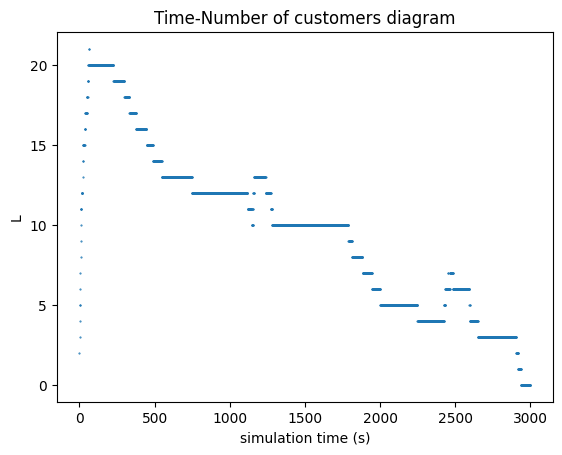

8.735

In [50]:
L = [0] * (SIM_TIME + 1)
for _, t in df.iterrows():
    for j in range(t["arrival_time"], t["service_end"]+1):
        L[j] += 1

_, main_ax = plt.subplots()
main_ax.plot(L, linestyle='None', marker='.', markersize=1)
main_ax.set_xlabel('simulation time (s)')
main_ax.set_ylabel('L')
main_ax.set_title('Time-Number of customers diagram')
plt.show()

LQ = [i-1 for i in L if i>0]
avg_LQ = np.dot(*np.unique(LQ, return_counts=True))/SIM_TIME
avg_LQ


<div dir="rtl">

#### میانگین زمان صرف شده در صف‌ها

</div>

In [53]:
avg_WQ = sum(t['service_end']-t['arrival_time']-t['service_time'] for _, t in df.iterrows())/len(df)
avg_WQ

29


919.6896551724138

<div dir="rtl">

#### میزان بهره‌وری پردازنده

</div>

In [55]:
utilization = 1 - len([i for i in L if i == 0])/SIM_TIME
utilization

0.979

<div dir="rtl">

#### درصد پردازه‌های منقضی شده

</div>

In [70]:
dropped_tasks = len([_ for _, t in df.iterrows() if t['service_end'] == 0])/len(df)
dropped_tasks

0.9963386727688787

<div dir="rtl">

## بهبود میانگین صرف شده در صف‌ها

</div>